# Parâmetros

Aqui faço a escolha de alguns parêmetros que serão utilizados bem como importo bibliotecas que serão utilizadas.

In [1]:
include("../comum.jl")
include("../modelos.jl")
using Evolutionary, Plots;
pyplot();

In [2]:
Ts     = 0.05 # Intervalo entre leituras da saída
tend   = 2.0  # tempo final para estabilização
t0     = 0.0  # instante inicial
r1     = 0.6  # referência junta 1
r2     = 0.8  # referência junta 2
xr = [r1, r2]
popul  = 20   # população
iterac = 15   #iterações
α = 10.       #parâmetro para o erro
β = 0.01      #parâmetro para o jerk
γ = 0.1       #parâmetro para o torque
per = 1/2     #inicio da leitura do vetor a parti de per do comprimento total
kp_end = AbstractFloat[]
kv_end = AbstractFloat[];

# Otimização

Aqui a otmização será feita junta por junta, iniciando da junta mais externa e assim seguindo. Os ganhos das juntas não otimizadas ainda serão mantidos nulos.

## Otimização junta 2

Aqui criei algumas funções para serem utilizadas na geração da população inicial. Como será visto posteriormente, dependendo da função geredora inicial temos diferentes resultados, isto para o cenário de 50 iterações do algoritmo genético (valor este utilizado para obter uma saída mais rápida).

In [3]:
function gerador2(n)
    n = n/2
    kp = push!(zeros(n-1),rand()*rand([10.,100.,1000.,10000]))
    kv = push!(zeros(n-1),rand()*rand([10.,100.,1000.]))
    vcat(kp,kv)
end;

In [25]:
function generateCusto(junta::Integer)
    out = function custo(gain::Vector{Float64})
        kp = SMatrix{2,2}(diagm([gain[1], gain[2]]))
        kv = SMatrix{2,2}(diagm([gain[3], gain[4]]))
        x, v, t, a, ta, j, tj, τ, t_tau = robot2dof(kp, kv, Ts, t0, tend, [r1, r2])
        
        sizeVector = length(x[1])

        erro_sum = 0.
        erro = -(x[junta]-xr[junta])
        erro_sum += sum(abs.(erro[floor(Integer,sizeVector*per):end])) 

        jerk_sum = 0.
        jerk_sum += sum(abs.(j[junta]))
        
        torque_sum = 0.
        torque_sum += sum(abs.(τ[junta]))
        
        torque_dif = 0.
        torque_dif += sum(abs.(diff(τ[junta])))
        
        xdif = 0.
        xdif += sum(abs.(diff(x[junta][1:floor(Integer,sizeVector*per)])))
        
        
        erro_sum = erro_sum * α
        jerk_sum = jerk_sum * β 
        torque_sum = torque_sum * γ
        
        println(" $(erro_sum) | $(jerk_sum) | $(torque_sum) | $(torque_dif) | $(xdif)")
        out =  erro_sum + jerk_sum + torque_sum + torque_dif + 10*xdif
        out
    end
end;

In [ ]:
N = 4
 result, fitness, cnt = ga(generateCusto(2), N; initPopulation = gerador2, populationSize = popul, ɛ = 0.1, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

 Progress:|███████████████████████████████████████████████████| 0.0% 139.10141629672034 | 0.7729863503426709 | 3.7447631929271914 | 5.136013786118333 | 0.11342029940626397
 3.333624452790822 | 11.325125318388944 | 4.660896689802019 | 11.049270445039284 | 0.7572355571713635
 0.04446698638008395 | 3.325352437978911 | 4.807962291241812 | 11.065456281000749 | 0.8008365995434981
 0.2898312665934455 | 58.68901762382555 | 6.0855948073010895 | 32.09954399542938 | 0.8039568613039322
 22.716816673241127 | 11.1495624974975 | 4.545748118425035 | 10.334739728236247 | 0.6490334835136755
 157.85069512961311 | 0.47680572385942155 | 3.7318777320435057 | 5.014068568470561 | 0.055989953693410005
 149.09869146687373 | 0.41896967076108277 | 3.7314175666978766 | 5.058834291693813 | 0.0818665909894329
 42.11408620927806 | 3.7500629251148223 | 3.9839046292715583 | 7.07573536928584 | 0.4922122752248758
 0.29484240062425227 | 44.128416304558385 | 5.497918246944801 | 25.685035150150586 | 0.8046248932593918
 0.24

 6.243008676563067e8 | 1.1521442082062152e16 | 1.2017309236131744e10 | 1.2017309236131743e11 | 0.0
 0.14616767433862976 | 23.641833510551077 | 5.355658867154479 | 16.619556661470963 | 0.797985238447429
 0.5980978023687833 | 16.452333542032925 | 4.972433992014619 | 13.406844875488417 | 0.7889688225321672
 0.04446698638008395 | 3.325352437978911 | 4.807962291241812 | 11.065456281000749 | 0.8008365995434981
 0.3415081480663673 | 51.63930871180796 | 6.289331280129885 | 28.991392617193004 | 0.8006337782367268
 154.96337780766711 | 0.3601230325296198 | 3.7327258018923333 | 5.003697782701039 | 0.0635366801228051


 166.6009973480699 | 0.42742265280961833 | 3.7398643661584945 | 4.929641729588644 | 0.02821469263497121
 48.75069291418528 | 3.2383413695707994 | 3.941814145142338 | 6.832613172177932 | 0.45995468609765516
 10.975750653877057 | 7.805843166241277 | 4.3927258350453355 | 9.38027248412757 | 0.6892924571031982
 2.6129119633206512 | 11.381468015872485 | 4.655555348762263 | 11.10556371174011 | 0.7611333839059911
 0.08983454588437634 | 167.64222070957632 | 8.494314517431738 | 77.99348761345524 | 0.865635356725456
 0.09837043989568639 | 31.356185008281663 | 5.670852310196636 | 20.036713708615977 | 0.7992696148311647
 514.1262610066831 | 3.5620631926550437 | 4.709852529757945 | 7.259686141609136 | 0.7692981020742672
 0.8392986030106042 | 41.60154097832715 | 6.065835722099594 | 24.538971879526223 | 0.7978993779973397
 22.047320661090446 | 5.349201268850079 | 4.165201522079999 | 7.979827297855799 | 0.6048457122547842
 0.04446698638008395 | 3.325352437978911 | 4.807962291241812 | 11.065456281000749

 0.18256820936076168 | 21.93429128547879 | 5.25270111988144 | 15.824273528154457 | 0.7968313766390062
 0.9295906526366005 | 14.716834145558872 | 4.86688683619528 | 12.589123450031735 | 0.7835438448286921
 0.044558226215262176 | 54.223799569215714 | 6.257170763617656 | 30.138439666376097 | 0.8000072260568556
 0.043078649668889524 | 56.15072153911856 | 6.114143842587815 | 30.96943981836883 | 0.8003492876720871
 0.04446698638008395 | 3.325352437978911 | 4.807962291241812 | 11.065456281000749 | 0.8008365995434981
 0.08553388200471801 | 50.43892571088317 | 5.7924627571880425 | 28.464726856792367 | 0.8011187332189176
 1.3166320523389807 | 13.628165214845174 | 4.800232110355027 | 12.13636794199864 | 0.7778482577071043
 1.3166320523389807 | 13.628165214845174 | 4.800232110355027 | 12.13636794199864 | 0.7778482577071043
 0.07265447153178117 | 34.280337575607284 | 5.200127960380723 | 21.261638663095706 | 0.801113610414064
 1.3166320523389807 | 13.628165214845174 | 4.800232110355027 | 12.13636794

 NaN | NaN | NaN | NaN | 0.0
 0.0766339020987139 | 55.75663606732596 | 6.074805520017504 | 30.81577479538759 | 0.8007674653382612
 0.07664278966644122 | 55.74075262081172 | 6.075964309674704 | 30.805895420763473 | 0.800765091863463
 0.0755715293810233 | 55.72814069087791 | 6.012898365741529 | 30.90592508111027 | 0.8007792543969297
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.0763

 NaN | NaN | NaN | NaN | 0.0
 Progress:|███████████████████████████████████████████████████| 40.0% 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678


 NaN | NaN | NaN | NaN | 0.0
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.04446698638008395 | 3.325352437978911 | 4.807962291241812 | 11.065456281000749 | 0.8008365995434981
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.08091325280564443 | 55.727347425690304 | 6.207000205626997 | 31.288937130945474 | 0.8007993294906685
 0.07663758367855045 | 55.72522036223969 | 

 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07152231890319993 | 55.72374214803716 | 5.900067744331749 | 30.476946749411844 | 0.8007335614027167
 0.07642495977988828 | 55.726409513739995 | 6.058556807879914 | 30.846899877940494 | 0.8007679076337716
 0.07642495977988828 | 55.726409513739995 | 6.058556807879914 | 30.846899877940494 | 0.8007679076337716
 NaN | NaN | NaN | NaN | 0.0
 Progress:|██████████████████████████████████████████████████| 46.7%

 NaN | NaN | NaN | NaN | 0.0
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.04446698638008395 | 3.325352437978911 | 4.807962291241812 | 11.065456281000749 | 0.8008365995434981
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6

 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07781228214813973 | 55.72442285898262 | 6.12943413997933 | 30.780244029759732 | 0.8007504223684516
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 0.07663758367855045 | 55.72522036223969 | 6.076325371677378 | 30.820159291091915 | 0.8007643812770678
 NaN | NaN | NaN | NaN | 0.0
 Progress:|██████████████████████████████████████████████████| 53.3%

 NaN | NaN | NaN | NaN | 0.0
 0.04446698638008395 | 3.325352437978911 | 4.807962291241812 | 11.065456281000749 | 0.8008365995434981


 NaN | NaN | NaN | NaN | 0.0


 NaN | NaN | NaN | NaN | 0.0
 NaN | NaN | NaN | NaN | 0.0


 6.100084462547786e8 | 1.1521442098371846e16 | 2.668478913525116e9 | 2.634765593360752e10 | 219607.90957118664
 NaN | NaN | NaN | NaN | 0.0


 NaN | NaN | NaN | NaN | 0.0
 NaN | NaN | NaN | NaN | 0.0


 NaN | NaN | NaN | NaN | 0.0
 NaN | NaN | NaN | NaN | 0.0


 NaN | NaN | NaN | NaN | 0.0
 NaN | NaN | NaN | NaN | 0.0


 6.233604728422695e8 | 1.1521442092283558e16 | 2.689122337711329e9 | 2.6565874023794132e10 | 339.60267017208196
 NaN | NaN | NaN | NaN | 0.0


 6.225497203225417e8 | 1.1521442066052172e16 | 2.6725224494773426e9 | 2.6431945080929173e10 | 235.4726214574324
 NaN | NaN | NaN | NaN | 0.0


 NaN | NaN | NaN | NaN | 0.0
 NaN | NaN | NaN | NaN | 0.0


 NaN | NaN | NaN | NaN | 0.0
 NaN | NaN | NaN | NaN | 0.0
 Progress:|███████████████████████████████████████████████████| 60.0%

 NaN | NaN | NaN | NaN | 0.0


 NaN | NaN | NaN | NaN | 0.0
 NaN | NaN | NaN | NaN | 0.0


 NaN | NaN | NaN | NaN | 0.0
 NaN | NaN | NaN | NaN | 0.0


 NaN | NaN | NaN | NaN | 0.0
 NaN | NaN | NaN | NaN | 0.0


 NaN | NaN | NaN | NaN | 0.0
 NaN | NaN | NaN | NaN | 0.0


 NaN | NaN | NaN | NaN | 0.0
 NaN | NaN | NaN | NaN | 0.0


 6.242320799681836e8 | 1.1521442076432974e16 | 2.663072035298314e9 | 2.6545585233676952e10 | 258.1019848775992
 NaN | NaN | NaN | NaN | 0.0


 NaN | NaN | NaN | NaN | 0.0
 NaN | NaN | NaN | NaN | 0.0


 NaN | NaN | NaN | NaN | 0.0
 NaN | NaN | NaN | NaN | 0.0


 NaN | NaN | NaN | NaN | 0.0
 NaN | NaN | NaN | NaN | 0.0


In [50]:
push!(kp_end, result[2])
push!(kv_end, result[4])
Markdown.parse("---|junta 2\n---|---\n**KP**|$(round(result[2],2))\n**KV**|$(round(result[4],2))")

|     –- | junta 2 |
| ------:| -------:|
| **KP** | -885.83 |
| **KV** |  -36.13 |


## Otimização junta 1

In [7]:
function gerador1(n)
    n = n/2
    kp = push!(zeros(n-2),rand()*rand([10.,100.,1000.,10000]))
    push!(kp,result[2])
    kv = push!(zeros(n-2),rand()*rand([10.,100.,1000.]))
    push!(kv,result[4])
    vcat(kp,kv)
end;

In [8]:
N = 4
 result, fitness, cnt = ga(generateCusto(1), N; initPopulation = gerador1, populationSize = popul, ɛ = 0.1, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

 Progress:|███████████████████████████████████████████████████| 0.0%

LoadError: [91mUndefVarError: result not defined[39m

In [9]:
push!(kp_end, result[1])
push!(kv_end, result[3])
Markdown.parse("---|junta 1\n---|---\n**KP**|$(round(result[1],2))\n**KV**|$(round(result[3],2))")

LoadError: [91mUndefVarError: result not defined[39m

## Resultado da otimização

In [10]:
kp = SMatrix{2,2}(diagm(flipdim(kp_end[1:2],1)))
kv = SMatrix{2,2}(diagm(flipdim(kv_end[1:2],1)))
x, v, t, a, ta, j, tj, τ, t_tau = robot2dof(kp, kv, Ts, t0, tend, [r1, r2])
function plotx()
    p1 = plot(t,x[1], label = "PD ótimo - junta 1",xlabel ="tempo (s)", ylabel = "posição (rad)")
    p1= plot!([r1],seriestype= :hline, label = "referência");
    p2 = plot(t,x[2], label = "PD ótimo - junta 2",xlabel ="tempo (s)", ylabel = "posição (rad)")
    p2 = plot!([r2],seriestype= :hline, label = "referência");
    plot(p1,p2, title = "Posição")
end

function plotj()
    p1 = plot(tj,j[1], label = "PD ótimo - junta 1", xlabel ="tempo (s)", ylabel = "Arrancada (rad/s³)")
    p2 = plot(tj,j[2], label = "PD ótimo - junta 2",xlabel ="tempo (s)", ylabel = "Arrancada (rad/s³)")
    plot(p1,p2, title = "Arrancada")
end;

function plotTau()
    p1 = plot(t_tau,τ[1], label = "PD ótimo - junta 1", xlabel ="tempo (s)", ylabel = "Torque (Nm)")
    p2 = plot(t_tau,τ[2], label = "PD ótimo - junta 2",xlabel ="tempo (s)", ylabel = "Torque (Nm)")
    plot(p1,p2, title = "Torque")
end;

function plotv()
    p1 = plot(t,v[1], label = "PD ótimo - junta 1", xlabel ="tempo (s)", ylabel = "Velocidade (rad/s)")
    p2 = plot(t,v[2], label = "PD ótimo - junta 2",xlabel ="tempo (s)", ylabel = "Velocidade (rad/s)")
    plot(p1,p2, title = "Velocidade")
end;

function plota()
    p1 = plot(ta,a[1], label = "PD ótimo - junta 1", xlabel ="tempo (s)", ylabel = "Aceleração (rad/s²)")
    p2 = plot(ta,a[2], label = "PD ótimo - junta 2",xlabel ="tempo (s)", ylabel = "Aceleração (rad/s²)")
    plot(p1,p2, title = "Aceleração")
end;


LoadError: [91mBoundsError: attempt to access 0-element Array{AbstractFloat,1} at index [1:2][39m

In [11]:
plotx()

LoadError: [91mUndefVarError: plotx not defined[39m

In [12]:
plotv()

LoadError: [91mUndefVarError: plotv not defined[39m

In [13]:
plota()

LoadError: [91mUndefVarError: plota not defined[39m

In [14]:
plotj()

LoadError: [91mUndefVarError: plotj not defined[39m

In [15]:
plotTau()

LoadError: [91mUndefVarError: plotTau not defined[39m

**A tabelas a seguir apresentam um resumo dos resultados para o PID otimizado.**

In [16]:
tabela(j, "Jerk")

LoadError: [91mUndefVarError: j not defined[39m

In [17]:
tabela(τ, "Torque")

LoadError: [91mUndefVarError: τ not defined[39m

In [18]:
erro = []
for i=1:7
    push!(erro, -(x[i] - xr[i]))
end 
tabela(erro, "Erro ótimo")

LoadError: [91mUndefVarError: x not defined[39m

# PD clássico

## Código

In [19]:
kp_pid = SMatrix{2,2}(diagm([2800., 80.]))
kv_pid = SMatrix{2,2}(diagm([315., 15.]))
x_pid, v_pid, t_pid, a_pid, ta_pid, j_pid, tj_pid, τ_pid, t_tau_pid = robot2dof(kp_pid, kv_pid, Ts, t0, tend, [r1, r2])
erro1 = -(x_pid[1] - r1)
erro2 = -(x_pid[2] - r2)
erro = [erro1, erro2]

function plotx_pd()
    p1 = plot(t_pid,x_pid[1], label = "PD - junta 1",xlabel ="tempo (s)", ylabel = "posição (rad)")
    p1= plot!([r1],seriestype= :hline, label = "referência");
    p2 = plot(t_pid,x_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "posição (rad)")
    p2 = plot!([r2],seriestype= :hline, label = "referência");
    plot(p1,p2, title = "Posição")
end

function plotj_pd()
    p1 = plot(tj_pid,j_pid[1], label = "PD - junta 1", xlabel ="tempo (s)", ylabel = "Arrancada (rad/s³)")
    p2 = plot(tj_pid,j_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "Arrancada (rad/s³)")
    plot(p1,p2, title = "Arrancada")
end;

function plotTau_pd()
    p1 = plot(t_tau_pid,τ_pid[1], label = "PD - junta 1", xlabel ="tempo (s)", ylabel = "Torque (Nm)")
    p2 = plot(t_tau_pid,τ_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "Torque (Nm)")
    plot(p1,p2, title = "Torque")
end;

function plotv_pid()
    p1 = plot(t_pid,v_pid[1], label = "PD - junta 1", xlabel ="tempo (s)", ylabel = "Velocidade (rad/s)")
    p2 = plot(t_pid,v_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "Velocidade (rad/s)")
    plot(p1,p2, title = "Velocidade")
end;

function plota_pid()
    p1 = plot(ta_pid,a_pid[1], label = "PD - junta 1", xlabel ="tempo (s)", ylabel = "Aceleração (rad/s²)")
    p2 = plot(ta_pid,a_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "Aceleração (rad/s²)")
    plot(p1,p2, title = "Aceleração")
end;



## Resultados PD

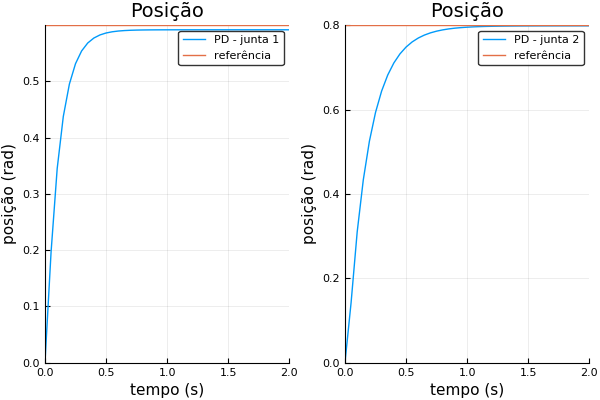

In [20]:
plotx_pd()

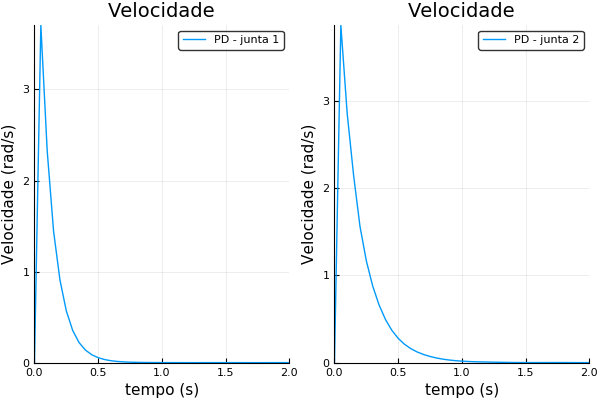

In [21]:
plotv_pid()

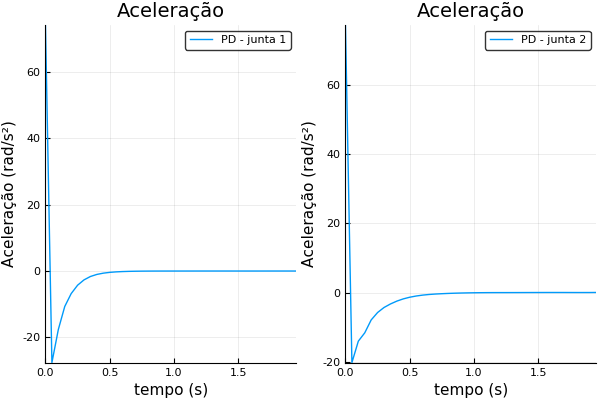

In [22]:
plota_pid()

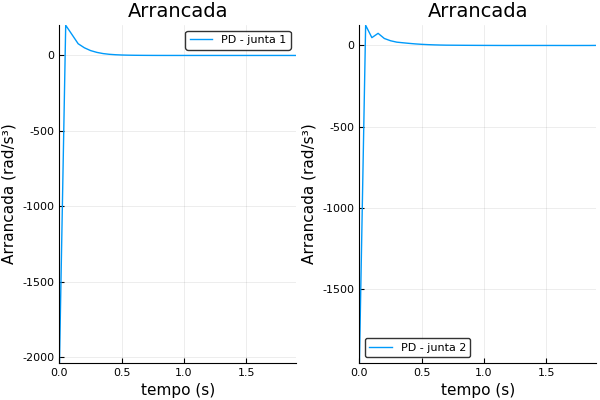

In [23]:
plotj_pd()

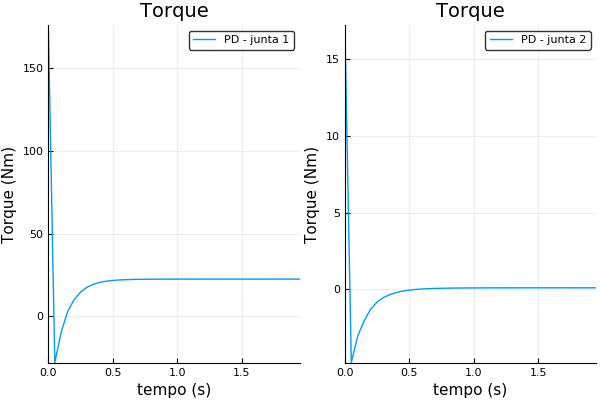

In [24]:
plotTau_pd()

**A tabelas a seguir apresentam um resumo dos resultados para o PID clássico.**

In [25]:
tabela(j_pid,"Jerk (PD)")


|                   –- | junta 1 | junta 2 |
| --------------------:| -------:| -------:|
| **Jerk (PD) máximo** | 2034.53 | 1954.23 |
| **Jerk (PD) mínimo** |     0.0 |    0.01 |
|  **Jerk (PD) total** | 2587.32 | 2361.25 |


In [26]:
tabela(τ_pid,"Torque (PD)")

|                     –- | junta 1 | junta 2 |
| ----------------------:| -------:| -------:|
| **Torque (PD) máximo** |  175.93 |   17.22 |
| **Torque (PD) mínimo** |    2.96 |     0.0 |
|  **Torque (PD) total** |   993.2 |   33.11 |


In [27]:
erro_pid = []
for i=1:7
    push!(erro_pid, -(x_pid[i] - xr[i]))
end 
tabela(erro_pid, "Erro PD")

LoadError: [91mBoundsError: attempt to access 2-element Array{Any,1} at index [3][39m

# Gráficos comparativos

## Posição

### Posição junta 1

In [28]:
plot(t,x[1],label = "PD ótimo - junta 1")
plot!(t,x_pid[1],label = "PD tradicional - junta 1")
plot!([r1],seriestype= :hline, label = "referência", title = "Posição junta 1", xlabel ="tempo (s)",ylabel ="posição (rad)")

LoadError: [91mUndefVarError: t not defined[39m

### Posição junta 2

In [29]:
plot(t,x[2],label = "PD ótimo - junta 2")
plot!(t,x_pid[2],label = "PD tradicional - junta 2")
plot!([r2],seriestype= :hline, label = "referência", title = "Posição junta 2", xlabel ="tempo (s)",ylabel ="posição (rad)")

LoadError: [91mUndefVarError: t not defined[39m

## Jerk

### Jerk junta 1

In [30]:
plot(tj,j[1],label = "PD ótimo - junta 1")
plot!(tj,j_pid[1],label = "PD tradicional - junta 1", title = "Arrancada junta 1", xlabel ="tempo (s)",ylabel ="Arrancada (rad/s³)")

LoadError: [91mUndefVarError: tj not defined[39m

### Jerk junta 2

In [31]:
plot(tj,j[2],label = "PD ótimo - junta 2")
plot!(tj,j_pid[2],label = "PD tradicional - junta 2", title = "Arrancada junta 2", xlabel ="tempo (s)",ylabel ="Arrancada (rad/s³)")

LoadError: [91mUndefVarError: tj not defined[39m

## Torque

### Torque junta 1

In [32]:
plot(t_tau_pid,τ[1],label = "PD ótimo - junta 1")
plot!(t_tau_pid,τ_pid[1],label = "PD tradicional - junta 1", title = "Torque junta 1", xlabel ="tempo (s)",ylabel ="Torque (Nm)")

LoadError: [91mUndefVarError: τ not defined[39m

### Torque junta 2

In [33]:
plot(t_tau_pid,τ[2],label = "PD ótimo - junta 2")
plot!(t_tau_pid,τ_pid[2],label = "PD tradicional - junta 2", title = "Torque junta 2", xlabel ="tempo (s)",ylabel ="Torque (Nm)")

LoadError: [91mUndefVarError: τ not defined[39m

## Velocidade

### Velocidade junta 1

In [34]:
plot(t,v[1],label = "PD ótimo - junta 1")
plot!(t,v_pid[1],label = "PD tradicional - junta 1", title = "Velocidade junta 1", xlabel ="tempo (s)",ylabel ="Velocidade (rad/s)")

LoadError: [91mUndefVarError: t not defined[39m

### Velocidade junta 2

In [35]:
plot(t,v[2],label = "PD ótimo - junta 2")
plot!(t,v_pid[2],label = "PD tradicional - junta 2", title = "Velocidade junta 2", xlabel ="tempo (s)",ylabel ="Velocidade (rad/s)")

LoadError: [91mUndefVarError: t not defined[39m

## Aceleração

### Aceleração junta 1

In [36]:
plot(ta,a[1],label = "PD ótimo - junta 1")
plot!(ta,a_pid[1],label = "PD tradicional - junta 1", title = "Aceleração junta 1", xlabel ="tempo (s)",ylabel ="Aceleração (rad/s²)")

LoadError: [91mUndefVarError: ta not defined[39m

### Aceleração junta 2

In [37]:
plot(ta,a[2],label = "PD ótimo - junta 2")
plot!(ta,a_pid[2],label = "PD tradicional - junta 2", title = "Aceleração junta 2", xlabel ="tempo (s)",ylabel ="Aceleração (rad/s²)")

LoadError: [91mUndefVarError: ta not defined[39m

# Discussão

## Sobre o torque

In [38]:
tabela(τ, "Torque (ótimo)")

LoadError: [91mUndefVarError: τ not defined[39m

In [39]:
tabela(τ_pid, "Torque (clássico)")

|                           –- | junta 1 | junta 2 |
| ----------------------------:| -------:| -------:|
| **Torque (clássico) máximo** |  175.93 |   17.22 |
| **Torque (clássico) mínimo** |    2.96 |     0.0 |
|  **Torque (clássico) total** |   993.2 |   33.11 |


## Sobre o Jerk

In [40]:
tabela(j, "Jerk (ótimo)")

LoadError: [91mUndefVarError: j not defined[39m

In [41]:
tabela(j_pid, "Jerk (clássico)")

|                         –- | junta 1 | junta 2 |
| --------------------------:| -------:| -------:|
| **Jerk (clássico) máximo** | 2034.53 | 1954.23 |
| **Jerk (clássico) mínimo** |     0.0 |    0.01 |
|  **Jerk (clássico) total** | 2587.32 | 2361.25 |


## Sobre a aceleração

In [42]:
tabela(a, "Aceleração (ótimo)")

LoadError: [91mUndefVarError: a not defined[39m

In [43]:
tabela(a_pid, "Aceleração (clássico)")

|                               –- | junta 1 | junta 2 |
| --------------------------------:| -------:| -------:|
| **Aceleração (clássico) máximo** |    74.1 |    77.4 |
| **Aceleração (clássico) mínimo** |     0.0 |     0.0 |
|  **Aceleração (clássico) total** |  148.22 |  154.83 |


## Sobre a velocidade

In [44]:
tabela(v, "Velocidade (ótimo)")

LoadError: [91mUndefVarError: v not defined[39m

In [45]:
tabela(v_pid, "Velocidade (clássico)")

|                               –- | junta 1 | junta 2 |
| --------------------------------:| -------:| -------:|
| **Velocidade (clássico) máximo** |     3.7 |    3.87 |
| **Velocidade (clássico) mínimo** |     0.0 |     0.0 |
|  **Velocidade (clássico) total** |    9.89 |   15.17 |


## Sobre o erro

In [46]:
tabela(erro, "Erro ótimo")
for i = 1:2
    println("erro final $(i) = $(erro[i][end])")
end

erro final 1 = 0.00804367941530526
erro final 2 = 0.0013694078829435963


In [47]:
tabela(erro_pid, "Erro PD")

|                 –- | junta 1 | junta 2 |
| ------------------:| -------:| -------:|
| **Erro PD máximo** |     0.6 |     0.8 |
| **Erro PD mínimo** |    0.01 |     0.0 |
|  **Erro PD total** |    1.97 |    3.48 |


# Teste

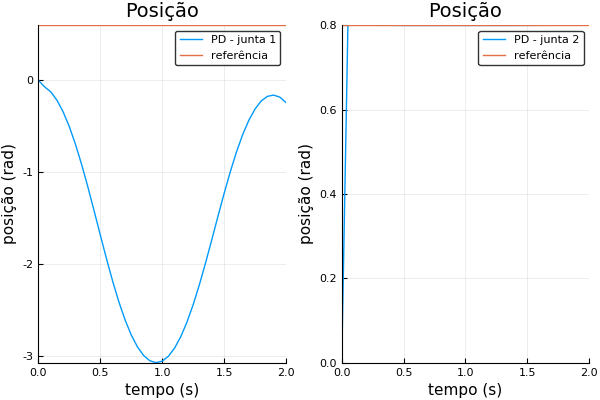

In [34]:
teste = [-0.00910712, 5710.41, 0.124346, 45.1596]
kp_pid = SMatrix{2,2}(diagm(teste[1:2]))
kv_pid = SMatrix{2,2}(diagm(teste[3:4]))
x_pid, v_pid, t_pid, a_pid, ta_pid, j_pid, tj_pid, τ_pid, t_tau_pid = robot2dof(kp_pid, kv_pid, Ts, t0, tend, xr);
function plotx_pd()
    p1 = plot(t_pid,x_pid[1], label = "PD - junta 1",xlabel ="tempo (s)", ylabel = "posição (rad)")
    p1= plot!([r1],seriestype= :hline, label = "referência");
    p2 = plot(t_pid,x_pid[2], label = "PD - junta 2",xlabel ="tempo (s)", ylabel = "posição (rad)")
    p2 = plot!([r2],seriestype= :hline, label = "referência");
    plot(p1,p2, title = "Posição")
end
plotx_pd()